# Research: Sale of apartments in service Yandex.Realty

***

Yandex.Realty aggregates listings from the largest and most reliable real estate websites and realtor databases. It maintains the quality of information it provides and, in result, the users see only those offers that can be trusted. Yandex.Realty filters out outdated and merges duplicate ads, checks the price and location of the property on offer.

At our disposal are Yandex.Real Estate service data - an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. We research how to determine the market value of real estate. Our task is to set the parameters. This will allow our to build an automated system: it will track anomalies and fraudulent activities.

For each apartment for sale, two types of data are available. The former are entered by the user, the latter are obtained automatically based on cartographic data. For example, the distance to the center, the airport, the nearest park and a pond.

### Description of the sequence of actions
- [Step 1. Learning General Information](#first-bullet)<br>
<br>
- [Step 2. Data preprocessing](#second-bullet)<br>
    - [2.1. Defining and filling in missing values](#second1-2-bullet)<br>
    - [2.2. Data Type Changes](#second1-3-bullet)<br>
<br>    
- [Step 3. Counting and adding data to the table](#third-bullet)<br>
    - [3.1. Count and add to the table: price per square meter](#second3-1-bullet)<br>
    - [3.2. Calculate and add to the table: day of the week, month and year of publication of the announcement](#second3-2-bullet)<br>
    - [3.3. Count and add to the table: apartment floor; options - first, last, other](#second3-3-bullet)<br>
    - [3.4. Calculate and add to the table: the ratio of living and total area, as well as the ratio of the area of the kitchen to the total](#second3-4-bullet)<br>
    - [3.5. To study the parameters: area, price, number of rooms, ceiling height](#second3-5-bullet)<br>
    - [3.6. Build histograms for each parameter: area, price, number of rooms, ceiling height](#second3-6-bullet)<br>
<br>    
- [Step 4. Conducting research data analysis](#fourth-bullet)<br>
    - [4.1. Task 1. Study the time of sale of apartments.](#fourth4-1-bullet)<br>
    - [4.2. Task 2. Remove rare and outdated values.](#fourth4-2-bullet)<br>
    - [4.3. Task 3. What factors most affect the value of the apartment?](#fourth4-3-bullet)<br>
    - [4.4. Task 4. Study the offers of apartments in St. Petersburg](#fourth4-4-bullet)<br>
    - [4.5. Task 5. Select the segment of apartments in the center.](#fourth4-5-bullet)<br>
<br>
- [Step 5. General conclusion](#fifth-bullet)<br>

### Data Description
- **airports_nearest** — distance to the nearest airport in meters (m);
- **balcony** — number of balconies;
- **ceiling_height** — ceiling height (m);
- **cityCenters_nearest** — distance to the city center (m);
- **days_exposition** — how many days the ad was posted (from publication to withdrawal);
- **first_day_exposition** — publication date;
- **floor**;
- **floors_total** — total floors in the house;
- **is_apartment** — apartments (boolean type);
- **kitchen_area** — kitchen area in square meters (m²);
- **last_price** — price at the time of withdrawal from publication;
- **living_area** — living area in square meters (m²);
- **locality_name** — name of the settlement;
- **open_plan** — free layout (boolean type);
- **parks_around3000** — the number of parks within a radius of 3 km;
- **parks_nearest** — distance to the nearest park (m);
- **ponds_around3000** — the number of reservoirs within a radius of 3 km;
- **ponds_nearest** — distance to the nearest body of water (m);
- **rooms** — number of rooms;
- **studio** — studio apartment (boolean type);
- **total_area** — apartment area in square meters (m²);
- **total_images** — the number of photos of the apartment in the ad.

## Step 1. Learning General Information<a class="anchor" id="first-bullet"></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
data = pd.read_csv('real_estate_data.csv')

<font color=green>Table size data.</font>

In [132]:
data.shape

(23699, 23)

<font color=green>Received 22 attributes.</font><br>
<font color=green>Let's see the first 5 rows of the data table.</font>

In [133]:
data.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<font color=green>General data information in the data table.</font>

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
Unnamed: 0              23699 non-null int64
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest   

### Conclusion

There are 23,699 records in the data set, 22 columns. <br>
There are different types of data in the dataset.

## Step 2. Data preprocessing <a class="anchor" id="second-bullet"></a>

<font color=green>The presence and amount of duplicate in the data table.</font>

In [135]:
data.duplicated().sum()

0

### **2.1. Defining and filling in missing values** <a class="anchor" id="second1-2-bullet"></a>

<font color=green>The presence and quantity of missing data in the data table.</font>

In [136]:
data.isna().sum()

Unnamed: 0                  0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<font color=green>**Let's see all the missing data that was revealed in the previous cell in the order of the presence of missing data.**</font>
<font color=green>**1.**</font> ceiling_height           **9195**<br>
<font color=green>**2.**</font> floors_total               **86**<br>
<font color=green>**3.**</font> living_area              **1903**<br>
<font color=green>**4.**</font> is_apartment            **20924**<br>
<font color=green>**5.**</font> kitchen_area             **2278**<br>
<font color=green>**6.**</font> balcony                 **11519**<br>
<font color=green>**7.**</font> locality_name              **49**<br>
<font color=green>**8.**</font> airports_nearest         **5542**<br>
<font color=green>**9.**</font> cityCenters_nearest      **5519**<br>
<font color=green>**10.**</font> parks_around3000         **5518**<br>
<font color=green>**11.**</font> parks_nearest           **15620**<br>
<font color=green>**12.**</font> ponds_around3000         **5518**<br>
<font color=green>**13.**</font> ponds_nearest           **14589**<br>
<font color=green>**14.**</font> days_exposition          **3181**

**1. ceiling_height** – 9195 missing values.<br>
On average, the ceiling height in apartments in Russia ranges from 2.4 - 3.2 m. The minimum ceiling height is determined by building codes 2.4 m. The ceiling height in apartments depends on the developer and does not depend on the number of stories of the house or on the area of the apartment itself.

In [137]:
chm = data['ceiling_height'].max()
ceiling_min = data['ceiling_height'].min()
ceiling_mean = data['ceiling_height'].mean()
ceiling_median = data['ceiling_height'].median()

print("The maximum value in the ceiling height column is: {:.2f}(м)".format(chm))
print("The maximum value in the ceiling height column: {:.2f}(м)".format(ceiling_min))
print("Ceiling Height Column Average: {:.2f}(м)".format(ceiling_mean))
print("Column Median Ceiling Height: {:.2f}(м)".format(ceiling_median))

The maximum value in the ceiling height column is: 100.00(м)
The maximum value in the ceiling height column: 1.00(м)
Ceiling Height Column Average: 2.77(м)
Column Median Ceiling Height: 2.65(м)


<font color=green>First I looked at the maximum, minimum, median and average values ​​and then I remembered about the method describe().</font>

In [138]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<font color=green>The average ceiling is 2.77 meters. This is a fairly high ceiling.</font><br>
<font color=green>Also in the column, there are gaps in the amount of 9195 values. I mean the gaps in the median value of the column.</font><br>
<font color=green>Check that the gaps are filled:</font>

In [139]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print (data['ceiling_height'].isna().sum())

0


**2. floors_total** – 86 missing values. <br>
The number of floors in the house also depends on the building plan. In the column, 86 values ​​are missing, since we do not know the plan of buildings and developers, we assume that these are single-story houses. Fill the gaps with the value 1. Even if our assumption is wrong, 86 records should not greatly shift the distribution.

In [140]:
data['floors_total'] = data['floors_total'].fillna(1)
print (data['floors_total'].isna().sum())

0


**3. living_area** – 1903 missing values.<br>
Fill in the missing values with the median value.

In [141]:
data.loc[data['living_area'].isnull(), 'living_area'] = data['living_area'].median()
print (data['living_area'].isna().sum())

0


**4. is_apartment** – 20924 missing values.<br>
The Boolean type is required in the apartment column. Data values are either True - the apartment is apartments, and False - the apartment is not apartments. Fill the gaps with the value "False" and check that the gaps are filled:

In [142]:
print (f"The number of missing data in the column is_apartment: {data['is_apartment'].isna().sum()}")       

The number of missing data in the column is_apartment: 20924


In [143]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print (f"Check for missing data: \n{data['is_apartment'].value_counts()}")

Check for missing data: 
False    23649
True        50
Name: is_apartment, dtype: int64


In [144]:
print (data['is_apartment'].isna().sum())

0


**5. kitchen_area** – 2278 missing values.<br>
Fill in the missing values with the median value.

In [145]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
print (data['kitchen_area'].isna().sum())

0


**6. balcony** – 11519 missing values.<br>
The number of balconies in an apartment also depends on the building plan. The column omits 11,519 values, so we don’t know what these one-story houses are. Fill in the default gaps of 0.0 and verify that the gaps are filled:

In [146]:
data['balcony'] = data['balcony'].fillna(0.0)

In [147]:
print (f"The amount of data in the column balcony: \n{data['balcony'].value_counts()}")

The amount of data in the column balcony: 
0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


In [148]:
print (f"Check for missing data: {data['balcony'].isna().sum()}")

Check for missing data: 0


**7. locality_name** – 49 missing values.<br>
In the column the name of the settlement - 49 missing values. This is a small number of missing values, but it is necessary to make the field the name of the launched item mandatory.

In [149]:
len(data['locality_name'])

23699

In [150]:
print (f"Check for missing data: {data['locality_name'].isna().sum()}")

Check for missing data: 49


In [151]:
data['locality_name'] = data['locality_name'].fillna('undefined')

<font color=green>Since the name of the area does not correlate with other features.<br>
I fill in 49 values - information for these values is not defined (undefined).</font>

In [152]:
data['locality_name'] = data['locality_name'].fillna('undefined')
print (f"Check for missing data: {data['locality_name'].isna().sum()}")

Check for missing data: 0


**8. airports_nearest** – 5542 missing values.<br>
**9. cityCenters_nearest** – 5519 missing values.<br>

In the columns, the distance to the airports is 5 542 missing values, in the column, the distance to the city center is 5 519 missing values. Fill the data with the median value.

In [153]:
median_data = data.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'],
    aggfunc='median'
)

median_data

,airports_nearest,cityCenters_nearest
locality_name,,
undefined,22041.0,8943.0
Зеленогорск,72282.0,53381.0
Колпино,26232.0,32018.0
Красное Село,25715.5,29140.5
Кронштадт,67850.0,49575.0
Ломоносов,48415.5,51677.0
Павловск,20529.5,32683.0
Петергоф,39231.0,33771.0
Пушкин,15766.0,27930.5


In [154]:
median_data_localities = list(median_data.index)

In [155]:
def fill_missing_data(row, col):
    locality = row['locality_name']
    
    if locality in median_data_localities:
        return median_data.loc[locality][col]
    
    return row[col]

In [156]:
columns = ['airports_nearest', 'cityCenters_nearest']

for column in columns:
    data.loc[data[column].isnull(), column] = data.apply(fill_missing_data, axis=1, args=(column,))

In [157]:
data['airports_nearest'] = data['airports_nearest'].fillna(-999.99)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-999.99)

<font color=green>Check the data on how many settlements could not be filled.</font>

In [158]:
len(data[data['cityCenters_nearest'].isnull()]['locality_name'].unique())

0

**10. parks_around3000** – 5518 missing values.<br>
**11. parks_nearest** – 15620 missing values.<br>
**12. ponds_around3000** – 5518 missing values.<br>
**13. ponds_nearest** – 14589 missing values.<br>

Check the correlation of the parameters: the number of parks within a radius of 3 km, the distance to the nearest park (m), the number of reservoirs within a radius of 3 km, the distance to the nearest reservoir (m).

In [159]:
print ("\nLooking for the relationship between the number of parks within a radius of 3 km and other parameters:")
print (data.corr()['parks_around3000'].reset_index(name='correlation'))

#print (data.corr()['parks_nearest'].reset_index(name='correlation'))
#print (data.corr()['ponds_around3000'].reset_index(name='correlation'))
#print (data.corr()['ponds_nearest'].reset_index(name='correlation'))


Looking for the relationship between the number of parks within a radius of 3 km and other parameters:
                  index  correlation
0            Unnamed: 0     0.006901
1          total_images     0.021120
2            last_price     0.151058
3            total_area     0.164689
4                 rooms     0.137257
5        ceiling_height     0.056665
6          floors_total    -0.251019
7           living_area     0.176729
8                 floor    -0.163784
9          is_apartment     0.020767
10               studio    -0.030202
11            open_plan    -0.010077
12         kitchen_area     0.082927
13              balcony    -0.077777
14     airports_nearest     0.000577
15  cityCenters_nearest    -0.161683
16     parks_around3000     1.000000
17        parks_nearest    -0.259514
18     ponds_around3000     0.304316
19        ponds_nearest    -0.167103
20      days_exposition     0.060491


Since the correlation with other parameters for all 4 parameters is low. It can be said that the values ​​of these columns are independent of other quantities. We add information that for them the value is not defined since this will not affect the analysis.

In [160]:
data['parks_around3000'] = data['parks_around3000'].fillna(-999.99)
data['parks_nearest'] = data['parks_nearest'].fillna(-999.99)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-999.99)

print (f"Check for missing data: {data['parks_around3000'].isna().sum()}")
print (f"Check for missing data: {data['parks_nearest'].isna().sum()}")
print (f"Check for missing data: {data['ponds_nearest'].isna().sum()}")

Check for missing data: 0
Check for missing data: 0
Check for missing data: 0


**14. days_exposition** – 3181 missing values.<br>
The number of days the announcement of the sale of the apartment was posted. For each corrupted knowledge, we calculate the median value and fill in the gaps with the median value.

Before filling in the blanks in the days_exposition column, you need to translate the column "first_day_exposition" в тип данных %Y-%m-%d, т.к. column days_exposition depends on the second.

In [161]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [162]:
data.loc[data['days_exposition'].isnull(), 'days_exposition'] = data['days_exposition'].median()
print (f"Check for missing data: {data['days_exposition'].isna().sum()}")

Check for missing data: 0


### **2.2. Data Type Changes** <a class="anchor" id="second1-3-bullet"></a>

The name of the columns is shown in the list and the correct data types are marked in green, the wrong data type values are red.
- **airports_nearest** — distance to the nearest airport in meters (m); <font color=green>float64</font>
- **balcony** — number of balconies; <font color=red>float64</font>
- **ceiling_height** — ceiling height (m); <font color=green>float64</font>
- **cityCenters_nearest** — distance to the city center (m); <font color=red>float64</font>
- **days_exposition** — how many days the ad was posted (from publication to withdrawal); <font color=red>object</font>
- **first_day_exposition** — publication date;
- **floor**; <font color=green>int64</font>
- **floors_total** — total floors in the house; <font color=red>float64</font>
- **is_apartment** — apartments (boolean type); <font color=red>object</font>
- **kitchen_area** — kitchen area in square meters (m²); <font color=red>int64</font>
- **last_price** — price at the time of withdrawal from publication; <font color=green>float64</font>
- **living_area** — living area in square meters (m²); <font color=green>float64</font>
- **locality_name** — name of the settlement; <font color=green>object</font>
- **open_plan** — free layout (boolean type); <font color=green>bool</font>
- **parks_around3000** — the number of parks within a radius of 3 km; <font color=green>float64</font>
- **parks_nearest** — distance to the nearest park (m); <font color=green>float64</font>
- **ponds_around3000** — the number of reservoirs within a radius of 3 km; <font color=green>float64</font>
- **ponds_nearest** — distance to the nearest body of water (m); <font color=green>float64</font>
- **rooms** — number of rooms; <font color=green>int64</font>
- **studio** — studio apartment (boolean type); <font color=green>bool</font>
- **total_area** — apartment area in square meters (m²); <font color=green>float64</font>
- **total_images** — the number of photos of the apartment in the ad. <font color=green>int64</font>

For the following characteristics, you must convert the types:

| Sign              	| Source type 	| Replacement 	| Reason for Replacement                               	|
|----------------------	|--------------	|-----------	|-------------------------------------------------------	|
| balcony              	| `float64`    	| `int64`   	| The number of balconies cannot be an integer.              	|
| days_exposition      	| `float64`    	| `int64`   	| The number of days that an ad was published on the Internet. 	|
| first_day_exposition 	| `object`     	| `%Y-%m-%d`    | The date the ad was placed must be of type data.           	|
| floors_total         	| `float64`    	| `int64`   	| The number of floors in a house cannot be a real number. 	|
| is_apartment         	| `object`     	| `bool`    	| Is an apartment a type apartment - this is the value of two types. 	|
| kitchen_area         	| `int64`      	| `float64` 	| The kitchen area in the apartment may not be an integer.    	|

**1. balcony** – type float64 convert to int64<br>
**2. days_exposition** – type float64 convert to int64<br>
**3. floors_total** – type float64 convert to int64<br>


In [163]:
for column in ['balcony', 'floors_total', 'days_exposition']:
    data[column] = data[column].astype('int')

**4. first_day_exposition** – type object translate to %Y-%m-%d<br>

In [164]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

**5. is_apartment** – type object translate to bool.<br>
Since I filled the column data with False and True, I think this will be enough and it is not worth translating into the bool data type.

**6. kitchen_area** – type int64 translate to float64<br>

In [165]:
data['kitchen_area'] = data['kitchen_area'].astype('float')

<font color=green>Check for data type changes.</font>

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
Unnamed: 0              23699 non-null int64
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest

### Conclusion

- There are no duplicates in the data set;
- There are many missing data in the dataset. In such columns as: ceiling_height (9195), floors_total (86), living_area (1903), is_apartment (20924), kitchen_area (2278), balcony (11519), locality_name (49), airports_nearest (5542), cityCenters_nearest (5519), parks_around3000 (5518), parks_nearest (15620), ponds_around3000 (5518), ponds_nearest (14589), days_exposition (3181);

- In the column describing the height of the ceilings in apartments for sale (ceiling_heigh) - 9195 missing values filled the gaps with the median value for the column. On average, the ceiling height in apartments from the table data proposed for analysis = 2.77 (m). Interestingly, the maximum value in the column is the height of the ceilings: 100.00 (m), this is the height of the ceilings.

- In the column describing the number of floors in the house (floors_total) - 86 missing values, filled the gaps with a value of 1. Even if our assumption is wrong, 86 records should not greatly shift the distribution.

- In the column describing the living area in square meters (m²) (living_area) - 1903 missing values filled in the missing values with a median value.

- In the column describing the apartment as an apartment (is_apartment) - 20924 missing values. The values of the missing were replaced by False - the apartment is not an apartment. I did not change the data type in the column because I believe that the values True and False more clearly represent the relation of the property to the type of apartment.

- In the column describing the area of the kitchen in square meters (m²) (kitchen_area) - 2278 missing values, filled in the missing values with a median value.

- In the column describing the presence of a balcony (balcony) - 11519 missing values, filled with 0.0 values. She suggested that these are single-story houses, since she did not know either the building plan or the builder.

- In the column the name of the locality (locality_name) - 49 missing values, filled the values with the fact that the information for these values is not undefined (undefined). Since the name of the area does not correlate with other signs.

- In the columns, the distance to airports (airports_nearest) - 5 542 missing values and in the column the distance to the city center (cityCenters_nearest) 5 519 missing values. We fill in the data with the median value, for 336 lines it was not possible to fill in the values. In these cases, most likely, gaps appear in settlements that are not cities or are sufficiently far from cities. Or there is no data for calculating distances.

- In the columns, the number of parks within a radius of 3 km (parks_around3000), the distance to the nearest park (m) (parks_nearest), the number of reservoirs within a radius of 3 km (ponds_around3000), the distance to the nearest reservoir (m) (ponds_nearest): the number of missing values is 5518, 15620, 5518, 14589. Checked the correlation with other parameters, it turned out to be insignificant from 0.0005 to 0.3. Since the correlation with other parameters for all 4 parameters is low. It can be said that the values of these columns are independent of other quantities. She added information that for missing values in these columns, the value is not defined, as this will not affect the analysis.

- In the column describing the number of days of placing an advertisement for the sale of an apartment was posted (days_exposition) - 3181 missing values. For each missing value, it calculated the median value and the median value filled in the gaps. Before filling in the blanks in the days_exposition column, convert the first_day_exposition column to the data type% Y-% m-% d, because the days_exposition column depends on the date the ads were posted.

## Step 3. Counting and adding data to the table <a class="anchor" id="third-bullet"></a>

**3.1. Count and add to the table: price per square meter** <a class="anchor" id="second3-1-bullet"></a><br>
To find out the cost of one square meter, it is necessary to divide the cost of the apartment (column last_price) by the total area of the apartment (column total_area).

In [167]:
data['meter_price'] = data['last_price'] / data['total_area']
data['meter_price'] = data['meter_price'].astype('int')
print (f"The average cost per square meter for all apartments:\"{data['last_price'].sum() / data['total_area'].sum()}\"")

The average cost per square meter for all apartments:"108395.94031315896"


In [168]:
data[:5][['total_area', 'last_price', 'meter_price']]

,total_area,last_price,meter_price
0,108.0,13000000.0,120370
1,40.4,3350000.0,82920
2,56.0,5196000.0,92785
3,159.0,64900000.0,408176
4,100.0,10000000.0,100000


**3.2. Calculate and add to the table: day of the week, month and year of publication of the announcement** <a class="anchor" id="second3-2-bullet"></a>

In [169]:
data['day_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [170]:
data[:5][['first_day_exposition', 'day_week', 'month', 'year']]

,first_day_exposition,day_week,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


**3.3. Count and add to the table: apartment floor; options - first, last, other** <a class="anchor" id="second3-3-bullet"></a>

In [171]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data_floor_category = data.apply(categorize_floor, axis=1)

In [172]:
data_floor_category.value_counts()

другой       17446
последний     3336
первый        2917
dtype: int64

**3.4. Calculate and add to the table: the ratio of living and total area, as well as the ratio of the area of the kitchen to the total** <a class="anchor" id="second3-4-bullet"></a>

In [173]:
data['living_ratio'] = (data['living_area'] / data['total_area']) * 100
data['kitchen_ratio'] = (data['kitchen_area'] / data['total_area']) * 100
data['living_ratio'] = data['living_ratio'].astype(str) + '%'
data['kitchen_ratio'] = data['kitchen_ratio'].astype(str) + '%'

data_liv = (data['living_area'].sum() / data['total_area'].sum()) * 100
data_kit = (data['kitchen_area'].sum() / data['total_area'].sum()) * 100

print("The ratio of the residential and total area: {:.2f}".format(data_liv))
print("The ratio of the area of the kitchen to the total: {:.2f}".format(data_kit))


The ratio of the residential and total area: 56.50
The ratio of the area of the kitchen to the total: 17.28


In [174]:
data[:5][['total_area', 'living_area', 'living_ratio', 'kitchen_area', 'kitchen_ratio']]

,total_area,living_area,living_ratio,kitchen_area,kitchen_ratio
0,108.0,51.0,47.22222222222222%,25.0,23.14814814814815%
1,40.4,18.6,46.03960396039605%,11.0,27.22772277227723%
2,56.0,34.3,61.24999999999999%,8.3,14.821428571428571%
3,159.0,30.0,18.867924528301888%,9.1,5.723270440251572%
4,100.0,32.0,32.0%,41.0,41.0%


**3.5. To study the parameters: area, price, number of rooms, ceiling height** <a class="anchor" id="second3-5-bullet"></a>

In [175]:
data[:5][['total_area', 'rooms', 'ceiling_height', 'last_price']]

,total_area,rooms,ceiling_height,last_price
0,108.0,3,2.70,13000000.0
1,40.4,1,2.65,3350000.0
2,56.0,2,2.65,5196000.0
3,159.0,3,2.65,64900000.0
4,100.0,2,3.03,10000000.0


**3.6. Build histograms for each parameter: area, price, number of rooms, ceiling height** <a class="anchor" id="second3-6-bullet"></a><br>
We construct histograms of the dependencies of each of the parameters on the number of apartments sold.

AxesSubplot(0.125,0.125;0.775x0.755)


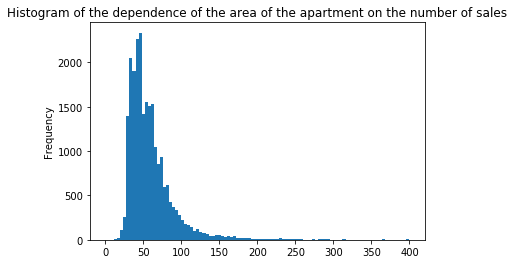

AxesSubplot(0.125,0.125;0.775x0.755)


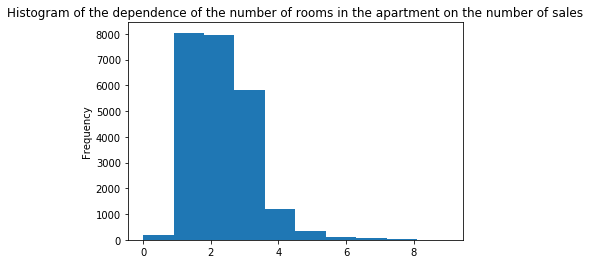

AxesSubplot(0.125,0.125;0.775x0.755)


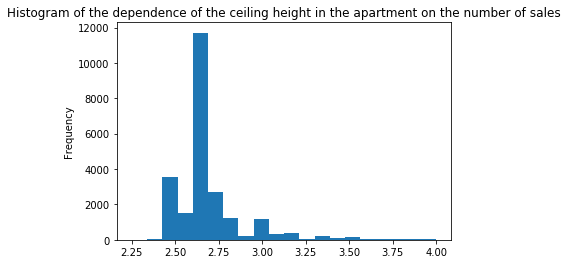

AxesSubplot(0.125,0.125;0.775x0.755)


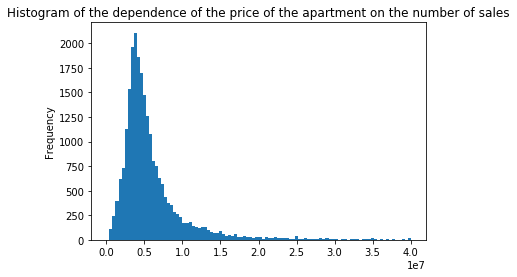

In [176]:
def hist_plots(data, columns, bins, ranges, ylims, titles):
    for i in range(0, len(columns)):
        print (data[columns[i]].plot(
            kind='hist', 
            bins=bins[i], 
            range=ranges[i],
            ylim=ylims[i],
            title=titles[i]
        ))
        plt.show()
    return

hist_plots(data, 
    ['total_area', 'rooms', 'ceiling_height', 'last_price'],
    [100, 10, 20, 100],
    [(0, 400), (0, 9), (2.25, 4), (0, 40000000)],
    [None, None, None, None],
    [
        "Histogram of the dependence of the area of the apartment on the number of sales",
        "Histogram of the dependence of the number of rooms in the apartment on the number of sales",
        "Histogram of the dependence of the ceiling height in the apartment on the number of sales",
        "Histogram of the dependence of the price of the apartment on the number of sales"
    ]
)

### Conclusion
- The price per square meter for all apartments provided in the data table was 108,395 rubles.
- Most often there are proposals for the sale of apartments not on the first and last floors. The number of such apartments in the total sample according to the data amounted to 17,446 apartments
- The ratio of residential represented apartments to the total area of apartments: 56.50%
- The ratio of the area of the kitchen of the presented apartments to the total apartments: 17.28%
- The most popular apartments are apartments with a total area of 40 sq. M to 60 sq. M.
- Also, the most popular apartments are one-room and two-room apartments.
- Most often, the ceiling height of the apartments in demand on the market is 2.6 m
- The cost of the most popular apartments on the market is 5,000,000 rubles.

## Step 4. Conducting research data analysis <a class="anchor" id="fourth-bullet"></a>

**4.1. Task 1.** <a class="anchor" id="fourth4-1-bullet"></a><br>
**Study the time of sale of apartments.**
- Build a histogram.
- Calculate the average and median.
- Describe how much a sale usually takes.
- When can we assume that sales were very fast, and when an unusually long time?

In [177]:
data['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [178]:
days_mean = data['days_exposition'].mean()
days_median = data['days_exposition'].median()

print("The average value for the column 'apartment sale time': {:.2f}(дней)".format(days_mean))
print("Median column 'apartment sale time': {:.2f}(дней)".format(days_median))

The average value for the column 'apartment sale time': 169.36(дней)
Median column 'apartment sale time': 95.00(дней)


<font color=green>Let’s build a histogram of the time of selling an apartment on the number of apartments sold.</font>

AxesSubplot(0.125,0.125;0.775x0.755)


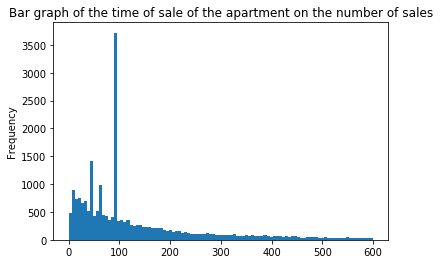

In [179]:
def hist_plots_time(data, columns, bins, ranges, ylims, titles):
    for i in range(0, len(columns)):
        print (data[columns[i]].plot(
            kind='hist', 
            bins=bins[i], 
            range=ranges[i],
            ylim=ylims[i],
            title=titles[i]
        ))
        plt.show()
    return

hist_plots_time(
    data, 
    ['days_exposition'],
    [100],
    [(0, 600)],
    [None],
    [
        'Bar graph of the time of sale of the apartment on the number of sales',
    ]
)

Removed the knockout values from the diagram above:

AxesSubplot(0.125,0.125;0.775x0.755)


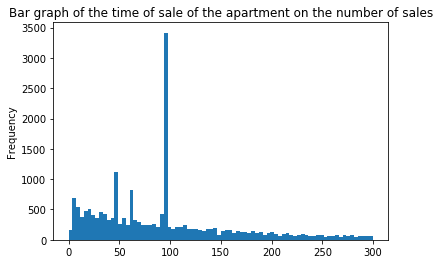

In [180]:
def hist_plots_time(data, columns, bins, ranges, ylims, titles):
    for i in range(0, len(columns)):
        print (data[columns[i]].plot(
            kind='hist', 
            bins=bins[i], 
            range=ranges[i],
            ylim=ylims[i],
            title=titles[i]
        ))
        plt.show()
    return

hist_plots_time(
    data, 
    ['days_exposition'],
    [80],
    [(0, 300)],
    [None],
    [
        'Bar graph of the time of sale of the apartment on the number of sales',
    ]
)

**Conclusion:**<br> 
**4.1. Task 1.**
- Average apartment sale time: 95 days
- The apartment is for sale immediately, or within 3 months (95 days). The histogram shows that after 90-100 days there is a decline in the number of apartments sold.

**4.2. Task 2.** <a class="anchor" id="fourth4-1-bullet"></a><br>
**Remove rare and outdated values.**<br>
We study the factors affecting the value of real estate.

<font color=green>Factors will be considered in the context of data that has been cleaned up in the previous steps. For slices, we will have the following conditions:</font>

In [181]:
total_area_query = 'total_area >= 12 and total_area <= 115'
last_price_query = 'last_price >= 4.3e+5 and last_price <= 1.2e+7'
rooms_query = 'rooms >= 1 and rooms <= 6'
ceiling_height_query = 'ceiling_height >= 2.4 and ceiling_height <= 3.2'
days_exposition_query = 'days_exposition >= 7 and days_exposition <= 430'

<font color=green>The dependence of the value of the real estate on the price per square meter.</font>

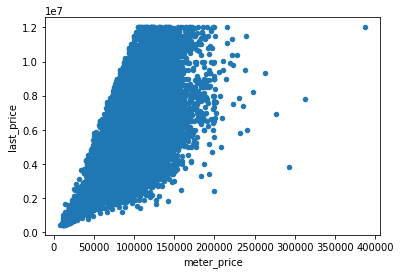

In [182]:
clean_data_query = f'{total_area_query} and {last_price_query}'
clean_data = data.query(clean_data_query)

clean_data.plot(x='meter_price', y='last_price', kind='scatter')
plt.show()

In [183]:
cor_clean_meter = clean_data['meter_price'].corr(clean_data['last_price'])
print("Correlation of property value from the price per square meter: {:.2f}".format(cor_clean_meter))

Correlation of property value from the price per square meter: 0.63


<font color=green>The dependence of the value of the real estate on the number of rooms.</font>

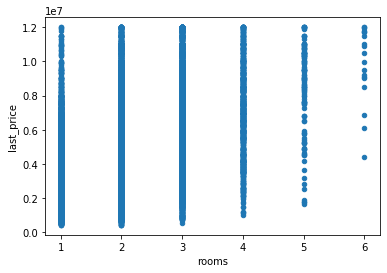

In [184]:
clean_data_query = f'{rooms_query} and {last_price_query}'
clean_data = data.query(clean_data_query)

clean_data.plot(x='rooms', y='last_price', kind='scatter')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


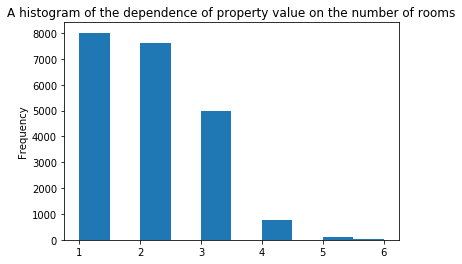

In [185]:
def hist_plots_room(data, columns, bins, ranges, ylims, titles):
    for i in range(0, len(columns)):
        print (data[columns[i]].plot(
            kind='hist', 
            bins=bins[i], 
            range=ranges[i],
            ylim=ylims[i],
            title=titles[i]
        ))
        plt.show()
    return

hist_plots_room(
    clean_data, 
    ['rooms'],
    [10],
    [(1, 6)],
    [None],
    [
        'A histogram of the dependence of property value on the number of rooms',
    ]
)

In [186]:
cor_clean_rooms = clean_data['rooms'].corr(clean_data['last_price'])
print("Correlation of property value from the number of rooms: {:.2f}".format(cor_clean_rooms))

Correlation of property value from the number of rooms: 0.45


<font color=green>The dependence of the value of the real estate on the floor.</font>

In [187]:
data[['floor', 'last_price']].query(last_price_query).pivot_table(index='floor', values='last_price')

,last_price
floor,
1,4.160474e+06
2,4.727048e+06
3,4.894708e+06
4,4.873951e+06
5,4.622358e+06
6,5.264891e+06
7,5.116754e+06
8,5.094503e+06
9,5.076549e+06


In [188]:
cor_clea_floor = clean_data['floor'].corr(clean_data['last_price'])
print("Correlation of property value from floor: {:.2f}".format(cor_clea_floor))

Correlation of property value from floor: 0.13


<font color=green>The dependence of the value of the real estate on the distance to the city center (m).</font>

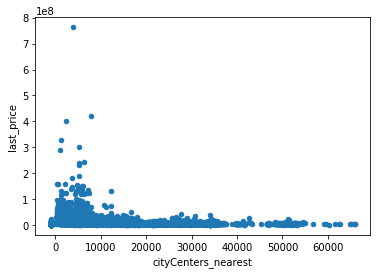

In [189]:
clean_data = data.query(last_price_query)
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter')
plt.show()

In [190]:
cor_clean_cityCenters = clean_data['cityCenters_nearest'].corr(clean_data['last_price'])
print("Correlation of property value from the number of rooms: {:.2f}".format(cor_clean_cityCenters))

Correlation of property value from the number of rooms: 0.11


<font color=green>The dependence of the value of the real estate on the date of publication of the announcement.</font>

In [191]:
clean_data = data.query(f'{days_exposition_query} and {last_price_query}')

In [192]:
clean_data[['day_week', 'month', 'year', 'last_price']].corr()

,day_week,month,year,last_price
day_week,1.000000,0.010180,-0.013679,-0.012430
month,0.010180,1.000000,-0.305183,0.004125
year,-0.013679,-0.305183,1.000000,0.028693
last_price,-0.012430,0.004125,0.028693,1.000000


<font color=green>Construct histograms of the dependencies of each of the parameters on the number of apartments sold.</font><br>
<font color=green>Such histograms have already been built, but now we will build histograms after cleaning.</font>

AxesSubplot(0.125,0.125;0.775x0.755)


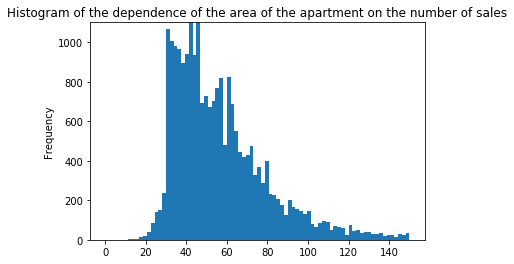

AxesSubplot(0.125,0.125;0.775x0.755)


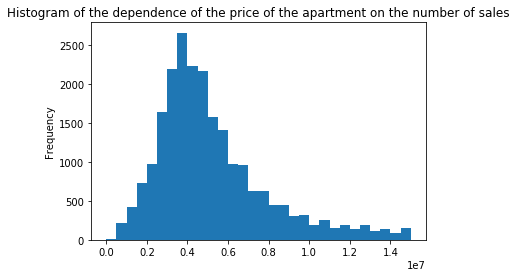

AxesSubplot(0.125,0.125;0.775x0.755)


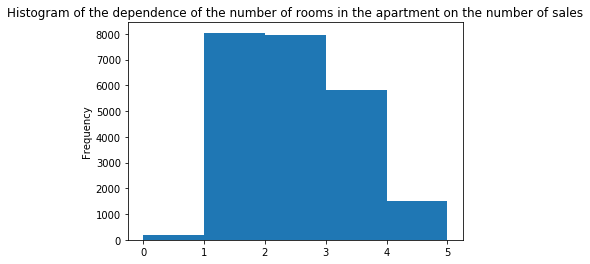

AxesSubplot(0.125,0.125;0.775x0.755)


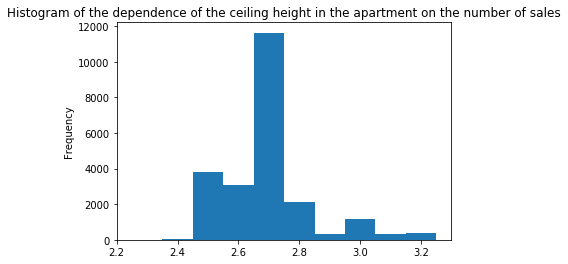

AxesSubplot(0.125,0.125;0.775x0.755)


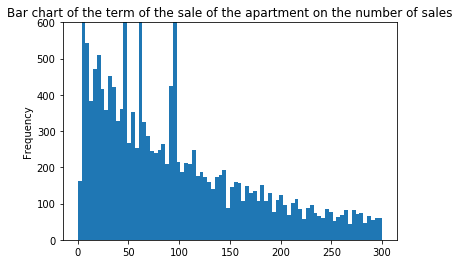

In [193]:
hist_plots(data,
    ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition'],
    [80, 30, 5, 10, 80],
    [(0, 150), (0, 15000000), (0, 5), (2.25, 3.25), (0, 300)],
    [(0, 1100), None, None, None, (0, 600)],
    [
        "Histogram of the dependence of the area of ​​the apartment on the number of sales",
        "Histogram of the dependence of the price of the apartment on the number of sales",
        "Histogram of the dependence of the number of rooms in the apartment on the number of sales",
        "Histogram of the dependence of the ceiling height in the apartment on the number of sales",
        "Bar chart of the term of the sale of the apartment on the number of sales"
    ]
)

**Conclusion:**<br> 
**4.2. Task 2.**

- According to the graphs and the correlation coefficient of the dependence of the value of real estate on the price per square meter, we see that there is a relationship between the change in the price per square meter and the value of real estate, it is 0.63.
- According to the graphs and the correlation coefficient of the dependence of the value of real estate on the number of rooms, we can say that there is a relationship between the change in the value of real estate and the number of rooms, but it is weak, equal to 0.45.
- According to the graphs and the correlation coefficient of the dependence of the value of real estate on the floor, we can say that there is a relationship between the change in the value of real estate and floor, but it is weak, equal to 0.13. It is noteworthy that the apartments on the ground floor are the cheapest from 4 000 000 rub.
- Apartments with an area of 35 to 60 sq. M are best sold.
- Most of all apartments with a price of 2 500 000 rub. up to 7 000 000 rub.
- The one-room and two-room apartments are most in demand.
- The most popular ceiling height 2.5m - 2.8m
- Most apartments are sold pretty quickly. from 0 to 95-160 days.

**4.3. Task 3.** <a class="anchor" id="fourth4-3-bullet"></a><br>
**What factors most affect the value of the apartment?**
- Examine whether the price depends on square meter, number of rooms, floor (first or last), remoteness from the center. Also study the dependence on the date of placement: day of the week, month and year.
- Select 10 locations with the most ads.
- Calculate the average price per square meter in these settlements.
- Highlight the settlements with the highest and lowest cost of housing. This data can be found by name in the column 'locality_name'.

<font color=green>The dependence of the price of apartments on the parameters: 1) prices per square meter, 2) the number of rooms, floor (first or last), 3) remoteness from the center, from 4) placement date, 5) day of the week, 6) month and 7) year .</font>

In [194]:
cor_meter = data['last_price'].corr(data['meter_price'])
print("The dependence of the price on the price per square meter: {:.6f}".format(cor_meter))

cor_rooms = data['last_price'].corr(data['rooms'])
print("The dependence of the price on the number of rooms: {:.6f}".format(cor_rooms))

data['floor_kind_category'] = data['floor'].astype('category').cat.codes
cor_floor = data['last_price'].corr(data['floor_kind_category'])
print("Dependence of price on floor: {:.6f}".format(cor_rooms))

cor_city = data['last_price'].corr(data[data['cityCenters_nearest'] != -999.99]['cityCenters_nearest'])
print("Dependence of price on distance from the center: {:.6f}".format(cor_city))

cor_days = data['last_price'].corr(data['day_week'])
print ("Dependence of the price on the day of publication: {:.6f}".format(cor_days))
cor_month = data['last_price'].corr(data['month'])
print ("Price Dependence on the Month of Publication: {:.6f}".format(cor_month))
cor_year = data['last_price'].corr(data['year']) 
print ("Dependence of the price on the year of publication: {:.6f}".format(cor_year))

The dependence of the price on the price per square meter: 0.736499
The dependence of the price on the number of rooms: 0.363343
Dependence of price on floor: 0.363343
Dependence of price on distance from the center: -0.206909
Dependence of the price on the day of publication: 0.001550
Price Dependence on the Month of Publication: 0.002779
Dependence of the price on the year of publication: -0.043089


- The price of an apartment depends on the price per square meter. The dependence on the number of rooms is also traced.
- The price does not depend on the other parameters presented above - the correlation coefficient is less than 0.1 and tends to zero.

<font color=green>We analyze the 10 settlements with the largest number of ads.</font><br>

In [195]:
top_city = data.groupby('locality_name')['last_price'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
top_city

,locality_name,count
34,Санкт-Петербург,15721
292,посёлок Мурино,522
327,посёлок Шушары,440
4,Всеволожск,398
33,Пушкин,369
14,Колпино,338
297,посёлок Парголово,327
7,Гатчина,307
94,деревня Кудрово,299
5,Выборг,237


<font color=green>We calculate the average price per square meter in these settlements.</font>

In [196]:
def mean_price(row):
    return data[data['locality_name'] == row]['meter_price'].median()

top_city['mean_price'] = top_city['locality_name'].apply(mean_price)
top_city

,locality_name,count,mean_price
34,Санкт-Петербург,15721,104761.0
292,посёлок Мурино,522,85878.0
327,посёлок Шушары,440,76876.0
4,Всеволожск,398,65789.0
33,Пушкин,369,100000.0
14,Колпино,338,74723.5
297,посёлок Парголово,327,91642.0
7,Гатчина,307,67796.0
94,деревня Кудрово,299,91860.0
5,Выборг,237,58158.0


<font color=green>It will find the settlements with the highest and lowest cost of housing.</font>

In [197]:
print(f"The highest cost of housing in \"{top_city.sort_values(by='mean_price', ascending=False).head(1)['locality_name'].to_string(index=False)}\"")
print(f"Lowest cost of housing in \"{top_city.sort_values(by='mean_price').head(1)['locality_name'].to_string(index=False)}\"")

The highest cost of housing in " Санкт-Петербург"
Lowest cost of housing in " Выборг"


**4.4. Task 4.** <a class="anchor" id="fourth4-4-bullet"></a><br>
**Study the offers of apartments in St. Petersburg.**
- For each apartment, there is information about the distance to the center. Highlight apartments in St. Petersburg ('locality_name'). Your task is to find out which area is in the center. Create a column with the distance to the center in kilometers: round to integer values.
- After that, calculate the average price for each kilometer.
- Build a chart: it should show how the price depends on the distance from the center.
- Define the border where the graph changes a lot - this will be the central zone.

<font color=green>We filter the data by location "St. Petersburg":</font>

In [198]:
spb_city = pd.DataFrame(data.loc[data['locality_name'] == 'Санкт-Петербург'])
spb_city.reset_index()
print (f"The number of apartments for sale in St. Petersburg:\"{len(spb_city)}\"")

The number of apartments for sale in St. Petersburg:"15721"


<font color=green>Create a column with the distance to the center in kilometers rounding to integer values.</font>

In [199]:
km = 1_000
spb_city['cityCenters_nearest_km'] = (spb_city['cityCenters_nearest'] / km)
spb_city[:5][['cityCenters_nearest_km', 'cityCenters_nearest']]

,cityCenters_nearest_km,cityCenters_nearest
0,16.028,16028.0
2,13.933,13933.0
3,6.800,6800.0
4,8.098,8098.0
7,11.634,11634.0


<font color=green>We’ll build a graph that shows how the price depends on the distance from the center:</font>

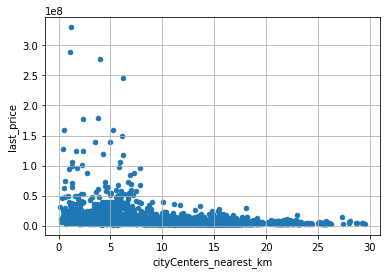

In [200]:
(
    pd.DataFrame(spb_city.pivot_table(index='cityCenters_nearest_km', values='last_price').to_records())
    .plot(x='cityCenters_nearest_km', y='last_price', kind='scatter', grid=True)
)
plt.show()

We define the border where the graph changes a lot - this will be the central zone. The graph changes abruptly at x = 7500. This means that the center includes all apartments in which the distance to the center is less than 7500.

**4.5. Task 5.** <a class="anchor" id="fourth4-5-bullet"></a><br>
**Select the segment of apartments in the center.**
- Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height.
- Also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of the advertisement).
- Draw conclusions. Do they differ from general findings throughout the city?

<font color=green>Find out which region is in the center of St. Petersburg.</font>

In [202]:
flat_spb_centr = pd.DataFrame(spb_city.query('cityCenters_nearest_km <= 7'))
print (f"The number of apartments for sale in the center of St. Petersburg:\"{len(flat_spb_centr)}\"")

The number of apartments for sale in the center of St. Petersburg:"3305"


In [210]:
flat_spb_centr = spb_city[spb_city['cityCenters_nearest'] < 7500]
flat_spb_centr.reset_index(drop=True, inplace=True)

def get_median(data, columns, names):
    for i in range(0, len(columns)):
        print (f"Median {names[i]}: {data[columns[i]].median()}")
    return 

print ("\nCenter of St. Petersburg:")
get_median(
    flat_spb_centr,
    [
        'last_price',
        'ceiling_height',
        'living_area',
        'kitchen_area',
        'rooms',
    ],
    [
        "apartment prices",
        "ceiling heights",
        "living space",
        "kitchen area",
        "number of rooms"
    ]
)

print ("\nThe whole city of St. Petersburg: ")
get_median(
    spb_city,
    [
        "last_price",
        "ceiling_height",
        "living_area",
        "kitchen_area",
        "rooms"
    ],
    [
        "apartment prices",
        "ceiling heights",
        "living space",
        "kitchen area",
        "number of rooms"
    ]
)


Center of St. Petersburg:
Median apartment prices: 9200000.0
Median ceiling heights: 2.8
Median living space: 43.0
Median kitchen area: 11.2
Median number of rooms: 3.0

The whole city of St. Petersburg: 
Median apartment prices: 5500000.0
Median ceiling heights: 2.65
Median living space: 30.1
Median kitchen area: 9.1
Median number of rooms: 2.0


<font color=green>We highlight the factors affecting the value of the apartment.</font><br>
<font color=green>Earlier, we already made a cut for apartments in the center of St. Petersburg, taking into account the normal range of prices. We add the remaining criteria that affect the purity of the data and make a final cut based on them.</font><br>

In [212]:
parameter = [
    "Price dependence per square meter",
    "Dependence of price on floor",
    "Price dependence on the number of rooms",
    "Dependence of price on distance from cent",
    "Price Dependence on Ceiling Height",
    "Dependence of price on the day of publication",
    "Dependence of the price on the month of publication",
    "Dependence of the price on the year of publication",
    "Median apartment prices",
    "Median ceiling height",
    "Median of living space",
    "Median of kitchen area",
    "Median of the number of rooms"
]

city_total_spb = { 
    'spb_city': [0.76, -0.03, 0.37, -0.25, 0.06, 0.00, 0.00, -0.04, 5500000.0, 2.65, 31.2, 9.7, 2.0],
    'flat_spb_centr': [0.79, -0.06, 0.31, -0.04, 0.07, 0.02, -0.01, -0.04, 9200000.0, 2.8, 46.0, 11.9, 3.0]
}

compare_data = pd.DataFrame(city_total_spb, index=parameter)
compare_data['difference'] = (compare_data['spb_city'] - compare_data['flat_spb_centr']).round(2)
compare_data

,spb_city,flat_spb_centr,difference
Price dependence per square meter,0.76,0.79,-0.03
Dependence of price on floor,-0.03,-0.06,0.03
Price dependence on the number of rooms,0.37,0.31,0.06
Dependence of price on distance from cent,-0.25,-0.04,-0.21
Price Dependence on Ceiling Height,0.06,0.07,-0.01
Dependence of price on the day of publication,0.00,0.02,-0.02
Dependence of the price on the month of publication,0.00,-0.01,0.01
Dependence of the price on the year of publication,-0.04,-0.04,0.00
Median apartment prices,5500000.00,9200000.00,-3700000.00
Median ceiling height,2.65,2.80,-0.15


**Conclusion:**<br> 
**4.5. Task 5.**
- The number of apartments for sale in the center of St. Petersburg: 3305
- The average apartment price in St. Petersburg: 5 500 000 rub.
- Average apartment prices in the center of St. Petersburg: 9,200,000 rubles.
- The average area of an apartment in St. Petersburg: 31.20 sq.m
- The average area of an apartment in the center of St. Petersburg: 46.00 sq.m
- The cost of an apartment in St. Petersburg is strongly influenced by: 1) the price of a square meter, 2) the location of the apartment, 3) the number of rooms
- In the center of St. Petersburg, apartments are expensive despite the average area of ​​apartments in the center of 46.00 sq.m. An interesting observation, apartments in such houses usually have high ceilings, a large living area, a large kitchen and at least 3 rooms. Also, according to the latest schedules, apartments in the center are sold pretty quickly.

## Step 5. General conclusion <a class="anchor" id="fifth-bullet"></a>

So I examined the sample provided by the Yandex.Real Estate service:
- Studied the data on sales of apartments;
- categorized and restored data;
- Found patterns in the data and filled all the gaps;
- Built graphs of the dependence of the price of the apartment on its parameters;
- In the sample, the city with the largest number of advertisements for the sale of apartments was found;
- Highlighted a segment of ads that are sold in the center of St. Petersburg;
- The dependence of the price of the apartment on its parameters for the city center has been determined.

The parameters that directly affect the cost of the apartment are defined:
- Location of the apartment (city / suburb, center / non-center);
- Number of rooms
- Living area of the apartment;
- number of rooms;
- Minor data such as “ceiling height, publication date” have little impact on pricing.

***